In [1]:
import numpy as np
import pandas as pd
import copy #Use for Deep copy
import math
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open('/content/drive/MyDrive/Dataset_for_Mtech_dissertation/Code for sentiment analysis/response_matrix.npy', 'rb') as f:
    response_matrix = np.load(f)
print(response_matrix)

[[ 3 -1 -1 ... -1 -1 -1]
 [ 3 -1 -1 ... -1 -1 -1]
 [ 3 -1  1 ... -1 -1  2]
 ...
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]]


In [3]:
train = pd.read_csv('/content/drive/MyDrive/Dataset_for_Mtech_dissertation/Code for sentiment analysis/new_gold.csv')
print(train.head())

   Unnamed: 0  original_question   ques  new_judgement
0           0           79185724  72701              1
1           1           79185900  72868              1
2           2           79186190  73151              2
3           3           79186569  73515              2
4           4           79186651  73592              0


In [4]:
judgement_counts = np.bincount(train['new_judgement'])
Negetive = judgement_counts[0]
Neutral = judgement_counts[1]
Positive = judgement_counts[2]
not_related = judgement_counts[3]
cant_tell = judgement_counts[4]

print(f'In gold data Positive : {Positive}, Neutral : {Neutral}, Negetive : {Negetive},\
        Not Related : {not_related}, Can not tell: {cant_tell}')

In gold data Positive : 190, Neutral : 250, Negetive : 228,        Not Related : 307, Can not tell: 25


In [5]:
c, r = len(np.unique(response_matrix))-1, response_matrix.shape[1]
p = r * c
Tot_ques = r
print(f"Total question {Tot_ques}")

Total question 98980


## Majority voting

In [6]:
def majority(J, block, a):
    for j in range(block.shape[1]):
        for k in range(block.shape[0]):
            if response_matrix[a + k][j] != -1:
                M[j][response_matrix[a + k][j]] += 1  
        
    return M

In [7]:
a, b = 0, 50

M = np.array([-1]*p).reshape(r, c)
Majority_Result = np.array([-1.]*r)

while b <= response_matrix.shape[0]:
    A = response_matrix[a : b]
    M = majority(M, A, a)
    
    for j in range(M.shape[0]):
        Majority_Result[j] = np.argmax(M[j])
    
    right = 0
    for j in range(len(train)):
        if train[train.columns[3]][j] == Majority_Result[train[train.columns[2]][j]]:
            right += 1

    print(f'Accuracy after {b} annotators\' response is {right / len(train) * 100 :.4f} %')
    
    a = b
    b += 50

Accuracy after 50 annotators' response is 55.0000 %
Accuracy after 100 annotators' response is 71.8000 %
Accuracy after 150 annotators' response is 77.5000 %
Accuracy after 200 annotators' response is 81.3000 %
Accuracy after 250 annotators' response is 84.0000 %
Accuracy after 300 annotators' response is 85.2000 %
Accuracy after 350 annotators' response is 85.7000 %
Accuracy after 400 annotators' response is 86.3000 %
Accuracy after 450 annotators' response is 86.7000 %
Accuracy after 500 annotators' response is 87.4000 %
Accuracy after 550 annotators' response is 87.6000 %
Accuracy after 600 annotators' response is 87.6000 %
Accuracy after 650 annotators' response is 87.9000 %
Accuracy after 700 annotators' response is 87.8000 %
Accuracy after 750 annotators' response is 87.9000 %
Accuracy after 800 annotators' response is 88.3000 %
Accuracy after 850 annotators' response is 88.5000 %
Accuracy after 900 annotators' response is 88.3000 %
Accuracy after 950 annotators' response is 88.3

Confusion matrix

In [8]:
Confusion_matrix = np.zeros((5, 5), dtype = 'int64')
for j in range(len(train)):
    if train[train.columns[3]][j] == 0:
        if train[train.columns[3]][j] == Majority_Result[train[train.columns[2]][j]]:
            Confusion_matrix[0][0] += 1
        elif Majority_Result[train[train.columns[2]][j]] == 1:
            Confusion_matrix[0][1] += 1
        elif Majority_Result[train[train.columns[2]][j]] == 2:
            Confusion_matrix[0][2] += 1
        elif Majority_Result[train[train.columns[2]][j]] == 3:
            Confusion_matrix[0][3] += 1
        elif Majority_Result[train[train.columns[2]][j]] == 4:
            Confusion_matrix[0][4] += 1
            
    if train[train.columns[3]][j] == 1:
        if train[train.columns[3]][j] == Majority_Result[train[train.columns[2]][j]]:
            Confusion_matrix[1][1] += 1
        elif Majority_Result[train[train.columns[2]][j]] == 0:
            Confusion_matrix[1][0] += 1
        elif Majority_Result[train[train.columns[2]][j]] == 2:
            Confusion_matrix[1][2] += 1
        elif Majority_Result[train[train.columns[2]][j]] == 3:
            Confusion_matrix[1][3] += 1
        elif Majority_Result[train[train.columns[2]][j]] == 4:
            Confusion_matrix[1][4] += 1
    
    if train[train.columns[3]][j] == 2:
        if train[train.columns[3]][j] == Majority_Result[train[train.columns[2]][j]]:
            Confusion_matrix[2][2] += 1
        elif Majority_Result[train[train.columns[2]][j]] == 0:
            Confusion_matrix[2][0] += 1
        elif Majority_Result[train[train.columns[2]][j]] == 1:
            Confusion_matrix[2][1] += 1
        elif Majority_Result[train[train.columns[2]][j]] == 3:
            Confusion_matrix[2][3] += 1
        elif Majority_Result[train[train.columns[2]][j]] == 4:
            Confusion_matrix[2][4] += 1
    
    if train[train.columns[3]][j] == 3:
        if train[train.columns[3]][j] == Majority_Result[train[train.columns[2]][j]]:
            Confusion_matrix[3][3] += 1
        elif Majority_Result[train[train.columns[2]][j]] == 0:
            Confusion_matrix[3][0] += 1
        elif Majority_Result[train[train.columns[2]][j]] == 1:
            Confusion_matrix[3][1] += 1
        elif Majority_Result[train[train.columns[2]][j]] == 2:
            Confusion_matrix[3][2] += 0
        elif Majority_Result[train[train.columns[2]][j]] == 4:
            Confusion_matrix[3][4] += 1
    
    if train[train.columns[3]][j] == 4:
        if train[train.columns[3]][j] == Majority_Result[train[train.columns[2]][j]]:
            Confusion_matrix[4][4] += 1
        elif Majority_Result[train[train.columns[2]][j]] == 0:
            Confusion_matrix[4][0] += 1
        elif Majority_Result[train[train.columns[2]][j]] == 1:
            Confusion_matrix[4][1] += 1
        elif Majority_Result[train[train.columns[2]][j]] == 2:
            Confusion_matrix[4][2] += 1
        elif Majority_Result[train[train.columns[2]][j]] == 3:
            Confusion_matrix[4][3] += 1
    
print(Confusion_matrix)

[[205  14   2   6   1]
 [  5 221   3  17   4]
 [  2  13 171   4   0]
 [  2   5   0 299   0]
 [  2   9   2   6   6]]


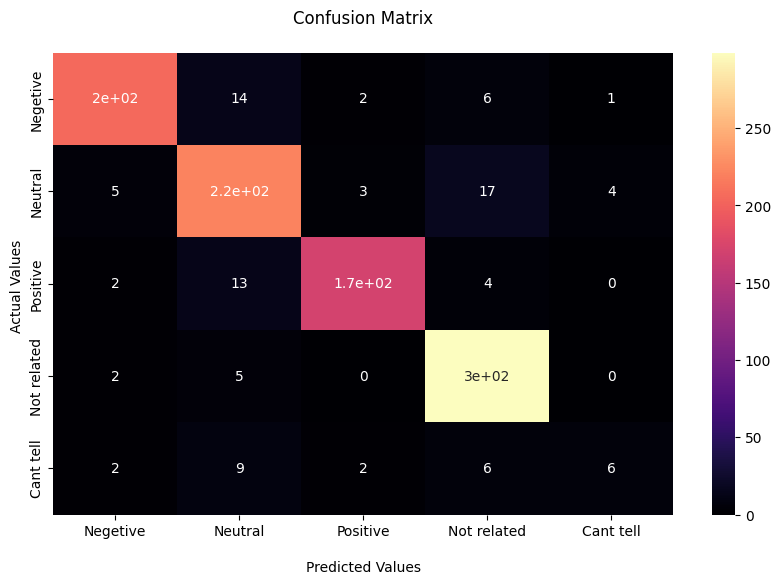

In [9]:
plt.figure(figsize=(10,6))
ax = sns.heatmap(Confusion_matrix, annot=True, cmap = plt.cm.magma)

ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(i for i in ('Negetive', 'Neutral', 'Positive', 'Not related', 'Cant tell'))
ax.yaxis.set_ticklabels(i for i in ('Negetive', 'Neutral', 'Positive', 'Not related', 'Cant tell'))
plt.show()

## Weighted Majority Voting

In [10]:
def weighted_majority(J, block, a):
    for j in range(block.shape[1]):
        for k in range(block.shape[0]):
            if response_matrix[a + k][j] != -1:
                M[j][response_matrix[a + k][j]] += accuracy[a + k]
        
    return M

In [11]:
s1 = int(len(train)* 0.3)
train2 = train[ : s1]

accuracy = [1 / len(train2)]*response_matrix.shape[0]
for i in range (response_matrix.shape[0]):
    tot, corr = 0.0, 0.0
    for j in range(len(train2)):
        if -1 != response_matrix[i][train2[train2.columns[2]][j]]:
            tot += 1
            if train2[train2.columns[3]][j] == response_matrix[i][train2[train2.columns[2]][j]]:
                corr += 1
    if tot != 0:
        accuracy[i] += corr / tot
minacc = np.min(accuracy)
maxacc = np.max(accuracy)
accuracy = (accuracy - minacc)/ (maxacc-minacc)
print(accuracy[ : 5])

[0.         0.66666667 0.85714286 0.86363636 0.5       ]


In [12]:
a, b = 0, 50

M = np.array([-1]*p).reshape(r, c)
Weighted_Majority_Result = np.array([-1.]*r)

while b <= response_matrix.shape[0]:
    A = response_matrix[a : b]
    M = weighted_majority(M, A, a)
    
    for j in range(M.shape[0]):
        Weighted_Majority_Result[j] = np.argmax(M[j])
    
    right = 0
    for j in range(len(train)):
        if train[train.columns[3]][j] == Weighted_Majority_Result[train[train.columns[2]][j]]:
            right += 1

    print(f'Accuracy after {b} annotators\' response is {right / len(train) * 100 :.4f} %')
    
    a = b
    b += 50

Accuracy after 50 annotators' response is 52.2000 %
Accuracy after 100 annotators' response is 68.8000 %
Accuracy after 150 annotators' response is 73.4000 %
Accuracy after 200 annotators' response is 76.4000 %
Accuracy after 250 annotators' response is 77.7000 %
Accuracy after 300 annotators' response is 78.5000 %
Accuracy after 350 annotators' response is 78.9000 %
Accuracy after 400 annotators' response is 79.4000 %
Accuracy after 450 annotators' response is 79.6000 %
Accuracy after 500 annotators' response is 80.1000 %
Accuracy after 550 annotators' response is 80.0000 %
Accuracy after 600 annotators' response is 80.3000 %
Accuracy after 650 annotators' response is 80.3000 %
Accuracy after 700 annotators' response is 80.3000 %
Accuracy after 750 annotators' response is 80.4000 %
Accuracy after 800 annotators' response is 80.6000 %
Accuracy after 850 annotators' response is 80.6000 %
Accuracy after 900 annotators' response is 80.8000 %
Accuracy after 950 annotators' response is 80.8

In [13]:
Confusion_matrix = np.zeros((5, 5), dtype = 'int64')
for j in range(len(train)):
    if train[train.columns[3]][j] == 0:
        if train[train.columns[3]][j] == Weighted_Majority_Result[train[train.columns[2]][j]]:
            Confusion_matrix[0][0] += 1
        elif Weighted_Majority_Result[train[train.columns[2]][j]] == 1:
            Confusion_matrix[0][1] += 1
        elif Weighted_Majority_Result[train[train.columns[2]][j]] == 2:
            Confusion_matrix[0][2] += 1
        elif Weighted_Majority_Result[train[train.columns[2]][j]] == 3:
            Confusion_matrix[0][3] += 1
        elif Weighted_Majority_Result[train[train.columns[2]][j]] == 4:
            Confusion_matrix[0][4] += 1
            
    if train[train.columns[3]][j] == 1:
        if train[train.columns[3]][j] == Weighted_Majority_Result[train[train.columns[2]][j]]:
            Confusion_matrix[1][1] += 1
        elif Weighted_Majority_Result[train[train.columns[2]][j]] == 0:
            Confusion_matrix[1][0] += 1
        elif Weighted_Majority_Result[train[train.columns[2]][j]] == 2:
            Confusion_matrix[1][2] += 1
        elif Weighted_Majority_Result[train[train.columns[2]][j]] == 3:
            Confusion_matrix[1][3] += 1
        elif Weighted_Majority_Result[train[train.columns[2]][j]] == 4:
            Confusion_matrix[1][4] += 1
    
    if train[train.columns[3]][j] == 2:
        if train[train.columns[3]][j] == Weighted_Majority_Result[train[train.columns[2]][j]]:
            Confusion_matrix[2][2] += 1
        elif Weighted_Majority_Result[train[train.columns[2]][j]] == 0:
            Confusion_matrix[2][0] += 1
        elif Weighted_Majority_Result[train[train.columns[2]][j]] == 1:
            Confusion_matrix[2][1] += 1
        elif Weighted_Majority_Result[train[train.columns[2]][j]] == 3:
            Confusion_matrix[2][3] += 1
        elif Weighted_Majority_Result[train[train.columns[2]][j]] == 4:
            Confusion_matrix[2][4] += 1
    
    if train[train.columns[3]][j] == 3:
        if train[train.columns[3]][j] == Weighted_Majority_Result[train[train.columns[2]][j]]:
            Confusion_matrix[3][3] += 1
        elif Weighted_Majority_Result[train[train.columns[2]][j]] == 0:
            Confusion_matrix[3][0] += 1
        elif Weighted_Majority_Result[train[train.columns[2]][j]] == 1:
            Confusion_matrix[3][1] += 1
        elif Weighted_Majority_Result[train[train.columns[2]][j]] == 2:
            Confusion_matrix[3][2] += 0
        elif Weighted_Majority_Result[train[train.columns[2]][j]] == 4:
            Confusion_matrix[3][4] += 1
    
    if train[train.columns[3]][j] == 4:
        if train[train.columns[3]][j] == Weighted_Majority_Result[train[train.columns[2]][j]]:
            Confusion_matrix[4][4] += 1
        elif Weighted_Majority_Result[train[train.columns[2]][j]] == 0:
            Confusion_matrix[4][0] += 1
        elif Weighted_Majority_Result[train[train.columns[2]][j]] == 1:
            Confusion_matrix[4][1] += 1
        elif Weighted_Majority_Result[train[train.columns[2]][j]] == 2:
            Confusion_matrix[4][2] += 1
        elif Weighted_Majority_Result[train[train.columns[2]][j]] == 3:
            Confusion_matrix[4][3] += 1
    
print(Confusion_matrix)

[[204  15   1   6   2]
 [ 19 207   8  13   3]
 [  4  24 158   4   0]
 [ 19  28   0 254   0]
 [  8   6   0   4   7]]


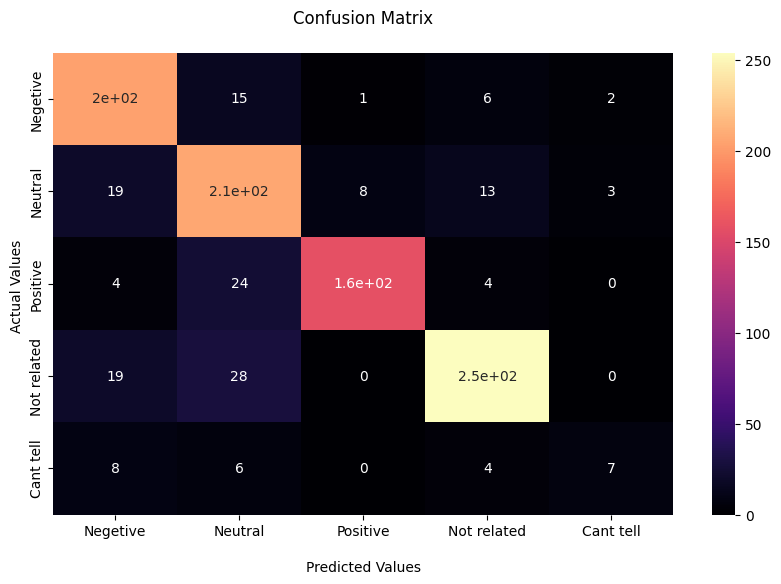

In [14]:
plt.figure(figsize=(10,6))
ax = sns.heatmap(Confusion_matrix, annot=True, cmap = plt.cm.magma)

ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(i for i in ('Negetive', 'Neutral', 'Positive', 'Not related', 'Cant tell'))
ax.yaxis.set_ticklabels(i for i in ('Negetive', 'Neutral', 'Positive', 'Not related', 'Cant tell'))
plt.show()